## Getting the coordinates for each city

In [6]:
import pandas as pd
import numpy as np

In [7]:
from private.s3_aws import access_key, secret_access_key

In [3]:
cities = pd.read_csv(f"s3://cleandatagrupo07/cities.csv",
    storage_options={
        "key": access_key,
        "secret": secret_access_key
    },
)

In [4]:
cities

,Unique_City_ID,City,County,State
0,oak_grovechristianky,Oak Grove,Christian,KY
1,jarvisburgcurritucknc,Jarvisburg,Currituck,NC
2,mcminnvilleyamhillor,McMinnville,Yamhill,OR
3,union_townshiperiepa,Union Township,Erie,PA
4,oshkoshwinnebagowi,Oshkosh,Winnebago,WI
...,...,...,...,...
25336,oakdalealleghenypa,Oakdale,Allegheny,PA
25337,benddeschutesor,Bend,Deschutes,OR
25338,stoutgrundyia,Stout,Grundy,IA
25339,collettsvillecaldwellnc,Collettsville,Caldwell,NC


In [4]:
cities['city_county_state'] = cities['City'] + ', ' + cities['County'] + ', '+ cities['State']

In [6]:
cities

,Unique_City_ID,City,County,State,city_county_state
0,oak_grovechristianky,Oak Grove,Christian,KY,"Oak Grove, Christian, KY"
1,jarvisburgcurritucknc,Jarvisburg,Currituck,NC,"Jarvisburg, Currituck, NC"
2,mcminnvilleyamhillor,McMinnville,Yamhill,OR,"McMinnville, Yamhill, OR"
3,union_townshiperiepa,Union Township,Erie,PA,"Union Township, Erie, PA"
4,oshkoshwinnebagowi,Oshkosh,Winnebago,WI,"Oshkosh, Winnebago, WI"
...,...,...,...,...,...
25336,oakdalealleghenypa,Oakdale,Allegheny,PA,"Oakdale, Allegheny, PA"
25337,benddeschutesor,Bend,Deschutes,OR,"Bend, Deschutes, OR"
25338,stoutgrundyia,Stout,Grundy,IA,"Stout, Grundy, IA"
25339,collettsvillecaldwellnc,Collettsville,Caldwell,NC,"Collettsville, Caldwell, NC"


In [5]:
from private.my_geo_username import my_geo_username

In [6]:
from geopy import geocoders  
gn = geocoders.GeoNames(my_geo_username)

In [7]:
def get_location(name):
    location = gn.geocode(name)
    if location:
        print(f"{name},{location.latitude},{location.longitude}")
        return location.latitude,location.longitude
    else:
        print(f"{name},{None},{None}")
        return None

In [10]:
cities

,Unique_City_ID,City,County,State,city_county_state
0,oak_grovechristianky,Oak Grove,Christian,KY,"Oak Grove, Christian, KY"
1,jarvisburgcurritucknc,Jarvisburg,Currituck,NC,"Jarvisburg, Currituck, NC"
2,mcminnvilleyamhillor,McMinnville,Yamhill,OR,"McMinnville, Yamhill, OR"
3,union_townshiperiepa,Union Township,Erie,PA,"Union Township, Erie, PA"
4,oshkoshwinnebagowi,Oshkosh,Winnebago,WI,"Oshkosh, Winnebago, WI"
...,...,...,...,...,...
25336,oakdalealleghenypa,Oakdale,Allegheny,PA,"Oakdale, Allegheny, PA"
25337,benddeschutesor,Bend,Deschutes,OR,"Bend, Deschutes, OR"
25338,stoutgrundyia,Stout,Grundy,IA,"Stout, Grundy, IA"
25339,collettsvillecaldwellnc,Collettsville,Caldwell,NC,"Collettsville, Caldwell, NC"


In [24]:
cities = cities[cities.index>24532]

,Unique_City_ID,City,County,State,city_county_state
24533,stringtownatokaok,Stringtown,Atoka,OK,"Stringtown, Atoka, OK"
24534,gaysmoultrieil,Gays,Moultrie,IL,"Gays, Moultrie, IL"
24535,american_forkutahut,American Fork,Utah,UT,"American Fork, Utah, UT"
24536,conwayfaulknerar,Conway,Faulkner,AR,"Conway, Faulkner, AR"
24537,leopolisshawanowi,Leopolis,Shawano,WI,"Leopolis, Shawano, WI"
...,...,...,...,...,...
25336,oakdalealleghenypa,Oakdale,Allegheny,PA,"Oakdale, Allegheny, PA"
25337,benddeschutesor,Bend,Deschutes,OR,"Bend, Deschutes, OR"
25338,stoutgrundyia,Stout,Grundy,IA,"Stout, Grundy, IA"
25339,collettsvillecaldwellnc,Collettsville,Caldwell,NC,"Collettsville, Caldwell, NC"


In [106]:
cities['location'] = cities.city_county_state.astype(str).apply(lambda x: get_location(x))

Massillon, Stark, OH,40.79672,-81.52151
Pompano Beach, Broward, FL,26.23786,-80.12477
Lake City, Wabasha, MN,44.44968,-92.2682
Holderness, Grafton, NH,43.73202,-71.58841
Banner, Floyd, KY,37.59927,-82.70127
Palmer, Marquette, MI,46.44077,-87.59319
Town of North Brookfield, Worcester, MA,42.26676,-72.08285
Tool, Henderson, TX,32.26792,-96.17025
Weybridge, Addison, VT,44.06645,-73.21568
Pierson, Woodbury, IA,42.54416,-95.86751
Stringtown, Atoka, OK,34.46676,-96.05333
Gays, Moultrie, IL,39.45809,-88.49394
American Fork, Utah, UT,40.3769,-111.79576
Conway, Faulkner, AR,35.0887,-92.4421
Leopolis, Shawano, WI,44.76803,-88.84483
Marthasville, Saint Charles, MO,None,None
Beaux Arts Village, King, WA,47.58533,-122.19832
Goldville, Tallapoosa, AL,33.08373,-85.78385
Washington, Macomb, MI,42.72448,-83.03604
Wawaka, Noble, IN,41.45699,-85.4822
Greers Ferry, Cleburne, AR,35.57702,-92.17737
Brookfield, Orange, VT,44.04229,-72.60344
Allentown, Lehigh, PA,40.60843,-75.49018
Johnson City, Broome, NY,42

Because of the GeocoderQuotaExceeded, we save the output in a file called ***location.csv***.<br>
We run the code for 1000 rows every some minutes.

In [155]:
cities_2 = pd.read_csv(f"s3://cleandatagrupo07/cities.csv",
    storage_options={
        "key": access_key,
        "secret": secret_access_key
    },
)

In [156]:
df_location = pd.read_csv('location.csv')

In [157]:
df_location.drop_duplicates(subset=['City','County','State'],inplace=True)

In [158]:
df_location

,City,County,State,Latitude,Longitude
0,Oak Grove,Christian,KY,36.66505,-87.44279
1,Jarvisburg,Currituck,NC,36.20294,-75.86658
2,McMinnville,Yamhill,OR,45.21012,-123.19872
3,Union Township,Erie,PA,41.89402,-79.82283
4,Oshkosh,Winnebago,WI,44.02471,-88.54261
...,...,...,...,...,...
25346,Oakdale,Allegheny,PA,40.39812,-80.18561
25347,Bend,Deschutes,OR,44.05817,-121.31531
25348,Stout,Grundy,IA,42.52637,-92.71186
25349,Collettsville,Caldwell,NC,35.92569,-81.67455


In [162]:
df_location.replace('None',np.nan,inplace=True)

In [163]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25341 entries, 0 to 25350
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       25341 non-null  object
 1   County     25341 non-null  object
 2   State      25341 non-null  object
 3   Latitude   24989 non-null  object
 4   Longitude  24989 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [164]:
cities_2['Latitude'] = df_location['Latitude']
cities_2['Longitude'] = df_location['Longitude']

In [165]:
cities_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25341 entries, 0 to 25340
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unique_City_ID  25341 non-null  object
 1   City            25341 non-null  object
 2   County          25341 non-null  object
 3   State           25341 non-null  object
 4   Latitude        24979 non-null  object
 5   Longitude       24979 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


Latitude and Longitude have some null values. We fill them with the coordinates of a city from the same county and state.

In [166]:
null_lat_lon = cities_2[cities_2.Latitude.isna()]

In [167]:
null_lat_lon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 198 to 25340
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unique_City_ID  362 non-null    object
 1   City            362 non-null    object
 2   County          362 non-null    object
 3   State           362 non-null    object
 4   Latitude        0 non-null      object
 5   Longitude       0 non-null      object
dtypes: object(6)
memory usage: 19.8+ KB


In [168]:
null_lat_lon = pd.merge(null_lat_lon,cities_2,how='left',on=['County','State'])

In [169]:
null_lat_lon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534 entries, 0 to 4533
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unique_City_ID_x  4534 non-null   object
 1   City_x            4534 non-null   object
 2   County            4534 non-null   object
 3   State             4534 non-null   object
 4   Latitude_x        0 non-null      object
 5   Longitude_x       0 non-null      object
 6   Unique_City_ID_y  4534 non-null   object
 7   City_y            4534 non-null   object
 8   Latitude_y        3646 non-null   object
 9   Longitude_y       3646 non-null   object
dtypes: object(10)
memory usage: 389.6+ KB


In [170]:
null_lat_lon.drop_duplicates(subset=['Unique_City_ID_x'],inplace=True)

In [171]:
null_lat_lon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 4522
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unique_City_ID_x  362 non-null    object
 1   City_x            362 non-null    object
 2   County            362 non-null    object
 3   State             362 non-null    object
 4   Latitude_x        0 non-null      object
 5   Longitude_x       0 non-null      object
 6   Unique_City_ID_y  362 non-null    object
 7   City_y            362 non-null    object
 8   Latitude_y        279 non-null    object
 9   Longitude_y       279 non-null    object
dtypes: object(10)
memory usage: 31.1+ KB


In [172]:
null_lat_lon.drop(['Latitude_x','Longitude_x','Unique_City_ID_y','City_y'],axis=1,inplace=True)

In [173]:
null_lat_lon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 4522
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unique_City_ID_x  362 non-null    object
 1   City_x            362 non-null    object
 2   County            362 non-null    object
 3   State             362 non-null    object
 4   Latitude_y        279 non-null    object
 5   Longitude_y       279 non-null    object
dtypes: object(6)
memory usage: 19.8+ KB


There are still some null values. We fill them with the coordinates of a city from the same state.

In [174]:
null_lat_lon = pd.merge(null_lat_lon,cities_2,how='left',on=['State'])

In [175]:
null_lat_lon.drop_duplicates(subset=['Unique_City_ID_x'],inplace=True)

In [176]:
null_lat_lon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 273524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unique_City_ID_x  362 non-null    object
 1   City_x            362 non-null    object
 2   County_x          362 non-null    object
 3   State             362 non-null    object
 4   Latitude_y        279 non-null    object
 5   Longitude_y       279 non-null    object
 6   Unique_City_ID    362 non-null    object
 7   City              362 non-null    object
 8   County_y          362 non-null    object
 9   Latitude          362 non-null    object
 10  Longitude         362 non-null    object
dtypes: object(11)
memory usage: 33.9+ KB


In [177]:
null_lat_lon.drop(['Latitude_y','Longitude_y','Unique_City_ID','City'],axis=1,inplace=True)

In [178]:
null_lat_lon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 273524
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unique_City_ID_x  362 non-null    object
 1   City_x            362 non-null    object
 2   County_x          362 non-null    object
 3   State             362 non-null    object
 4   County_y          362 non-null    object
 5   Latitude          362 non-null    object
 6   Longitude         362 non-null    object
dtypes: object(7)
memory usage: 22.6+ KB


In [179]:
city_lat_lon = null_lat_lon[['Unique_City_ID_x','Latitude','Longitude']]

In [180]:
city_lat_lon.rename(columns={'Unique_City_ID_x':'Unique_City_ID'},inplace=True)

/var/folders/wh/7jr3ry9j3cb9x1sd3ncj65w40000gn/T/ipykernel_870/1000764057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_lat_lon.rename(columns={'Unique_City_ID_x':'Unique_City_ID'},inplace=True)


In [181]:
cities_2 = pd.merge(cities_2,city_lat_lon,how='left',on='Unique_City_ID')

In [182]:
cities_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25341 entries, 0 to 25340
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unique_City_ID  25341 non-null  object
 1   City            25341 non-null  object
 2   County          25341 non-null  object
 3   State           25341 non-null  object
 4   Latitude_x      24979 non-null  object
 5   Longitude_x     24979 non-null  object
 6   Latitude_y      362 non-null    object
 7   Longitude_y     362 non-null    object
dtypes: object(8)
memory usage: 1.7+ MB


In [183]:
cities_2.Longitude_x = cities_2.Longitude_x.fillna(cities_2.Longitude_y)

In [184]:
cities_2.Latitude_x = cities_2.Latitude_x.fillna(cities_2.Latitude_y)

In [185]:
cities_2.drop(['Latitude_y','Longitude_y'],axis=1,inplace=True)

In [186]:
cities_2.rename(columns={'Latitude_x':'Latitude','Longitude_x':'Longitude'},inplace=True)

In [187]:
cities_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25341 entries, 0 to 25340
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unique_City_ID  25341 non-null  object
 1   City            25341 non-null  object
 2   County          25341 non-null  object
 3   State           25341 non-null  object
 4   Latitude        25341 non-null  object
 5   Longitude       25341 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


### MAP

In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [11]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

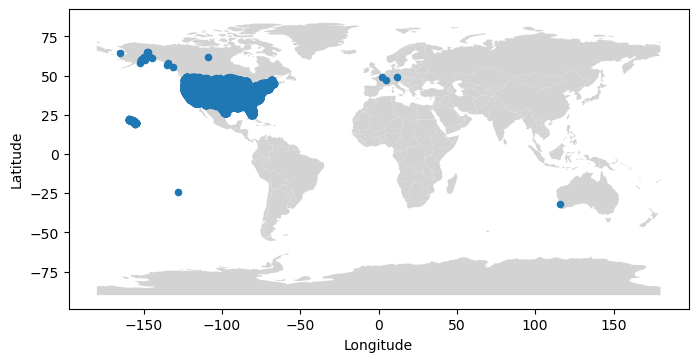

In [62]:
fig, ax = plt.subplots(figsize=(8,6))

countries.plot(color="lightgrey",ax=ax)

cities_2.plot(x="Longitude", y="Latitude", kind="scatter",ax=ax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [63]:
cities_2[(cities_2.Longitude>0)&(cities_2.Latitude<0)]

,Unique_City_ID,City,County,State,Latitude,Longitude
12515,ocean_parkpacificwa,Ocean Park,Pacific,WA,-31.69028,115.7197


In [64]:
cities_2.at[12515,'Longitude'] = -124.03452
cities_2.at[12515,'Latitude'] = 46.50019

In [65]:
cities_2[(cities_2.Longitude>0)]

,Unique_City_ID,City,County,State,Latitude,Longitude
460,unionunionor,Union,Union,OR,47.16667,4.83333
11897,bathunionin,Bath,Union,IN,49.10491,11.44228
20269,parisbourbonky,Paris,Bourbon,KY,48.85650,2.32100


In [66]:
cities_2.at[460,'Longitude'] = -117.86525
cities_2.at[460,'Latitude'] = 45.21126

cities_2.at[11897,'Longitude'] = -84.86304
cities_2.at[11897,'Latitude'] = 39.50930

cities_2.at[20269,'Longitude'] = -84.27022
cities_2.at[20269,'Latitude'] = 38.22222

In [67]:
cities_2[(cities_2.Longitude<0)&(cities_2.Latitude<0)]

,Unique_City_ID,City,County,State,Latitude,Longitude
20812,hendersonhendersonky,Henderson,Henderson,KY,-24.37368,-128.32615


In [68]:
cities_2.at[20812,'Longitude'] = -87.58708
cities_2.at[20812,'Latitude'] = 37.84492

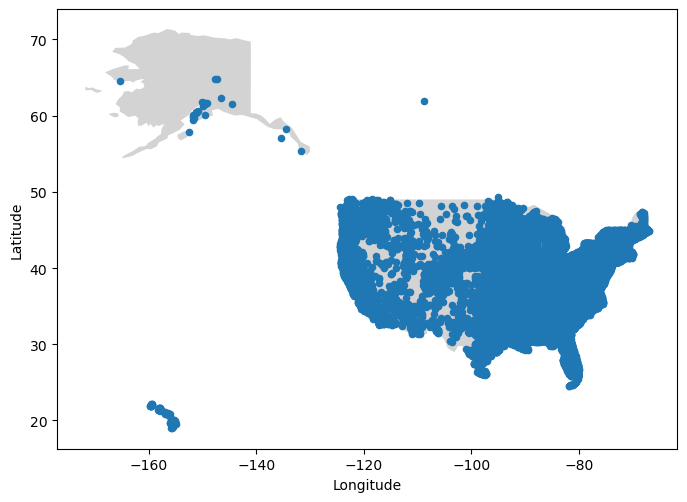

In [69]:
fig, ax = plt.subplots(figsize=(8,6))

countries[countries["name"] == "United States of America"].plot(color="lightgrey",ax=ax)

cities_2.plot(x="Longitude", y="Latitude", kind="scatter",ax=ax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [70]:
cities_2[(cities_2.Longitude<-100)&(cities_2.Longitude>-120)&(cities_2.Latitude>60)]

,Unique_City_ID,City,County,State,Latitude,Longitude
178,cobblakeca,Cobb,Lake,CA,61.91688,-108.75088


In [71]:
cities_2.at[178,'Longitude'] = -122.72858
cities_2.at[178,'Latitude'] = 38.83286

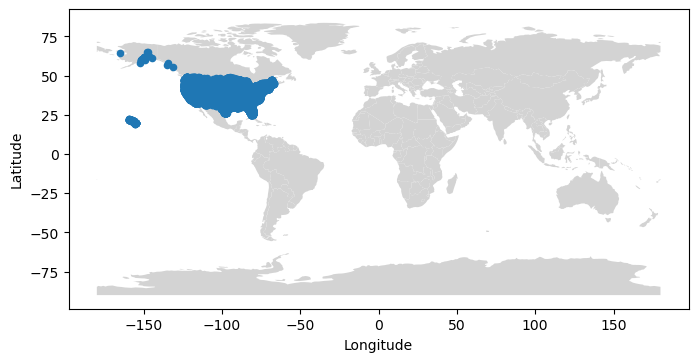

In [72]:
fig, ax = plt.subplots(figsize=(8,6))

countries.plot(color="lightgrey",ax=ax)

cities_2.plot(x="Longitude", y="Latitude", kind="scatter",ax=ax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The file is uploaded to our S3 bucket

In [74]:
cities_2.to_csv(f"s3://cleandatagrupo07/city_lat_lon.csv",
    storage_options={
        "key": access_key,
        "secret": secret_access_key
    },index=False
)